In [1]:
cd drive/MyDrive/Machine-Learning-fetch/

/content/drive/MyDrive/Machine-Learning-fetch


In [16]:
#Import all the necessary libraries needed for code
import math
import numpy as np
import pandas as pd
# Only using sklearn to scale the data . Could have done manually but I was facing issues while inversing them back at the end
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense,LSTM
import matplotlib.pyplot as plt


In [5]:
# Load the data
data=pd.read_csv('data_daily.csv')


In [6]:
df=data

In [7]:
df.head()

,# Date,Receipt_Count
0,2021-01-01,7564766
1,2021-01-02,7455524
2,2021-01-03,7095414
3,2021-01-04,7666163
4,2021-01-05,7771289


In [8]:
# Rename the data columns with Date and Receipt_count
df.columns=['Date','Receipt_count']


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 365 entries, 0 to 364
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Date           365 non-null    object
 1   Receipt_count  365 non-null    int64 
dtypes: int64(1), object(1)
memory usage: 5.8+ KB


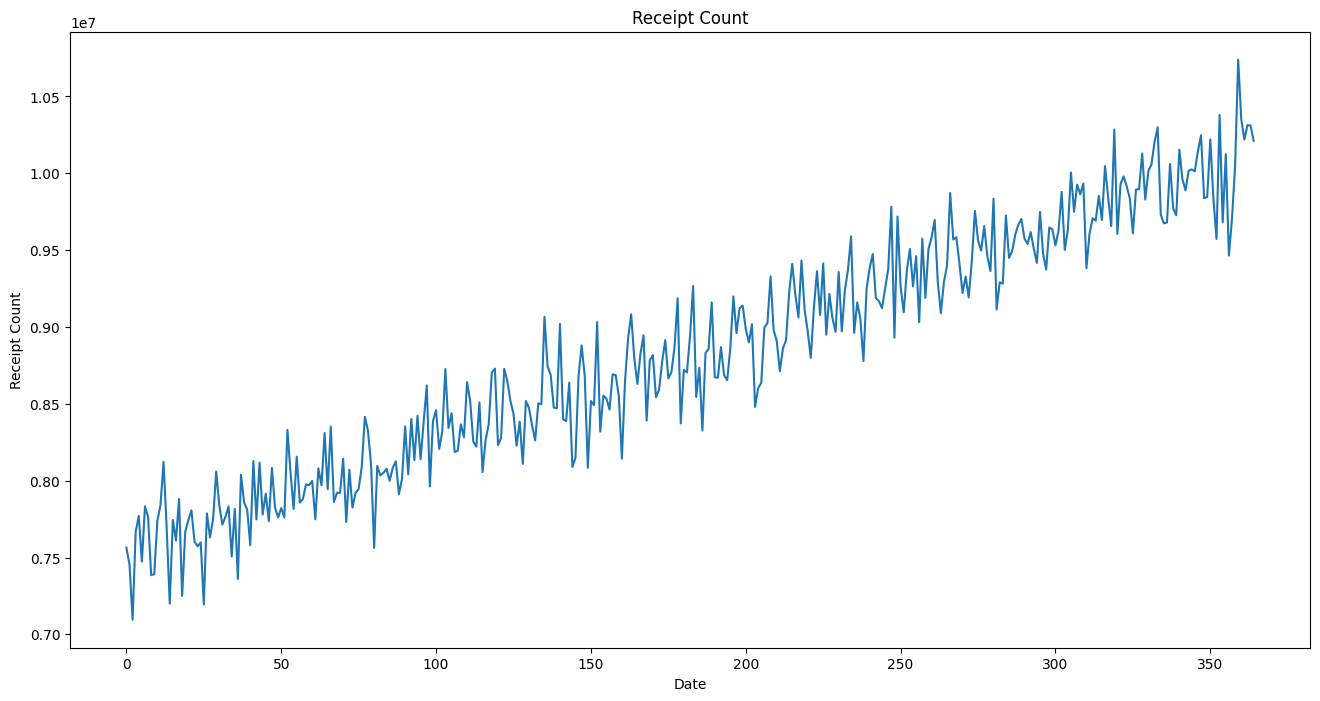

In [10]:
#Visualize the Receipt_count
plt.figure(figsize=(16,8))
plt.title('Receipt Count')
plt.plot(df['Receipt_count'])
plt.xlabel('Date')
plt.ylabel('Receipt Count')
plt.show()

One thing we can infer from the plot is that receipt count follows a linear trend .

This is a classic time forecasting problem .I used LSTM for this problem .  LSTMs are designed with memory cells that can retain information over long sequences, allowing them
to capture dependencies and patterns in data over extended periods.

In [11]:
# year 2022 data
df_2022 = pd.date_range(start='2022-01-01', end='2022-12-31', freq='D')

In [12]:
df['Day']=range(len(df))

In [13]:
df

,Date,Receipt_count,Day
0,2021-01-01,7564766,0
1,2021-01-02,7455524,1
2,2021-01-03,7095414,2
3,2021-01-04,7666163,3
4,2021-01-05,7771289,4
...,...,...,...
360,2021-12-27,10350408,360
361,2021-12-28,10219445,361
362,2021-12-29,10313337,362
363,2021-12-30,10310644,363


In [14]:
X=df['Day']
y=df['Receipt_count']

In [15]:
data=df.filter(['Receipt_count'])
data=data.values

In [17]:
# Using 90% of the data for training
training_data_len = math.ceil(len(data)*0.90)

In [18]:
# Scale the data
#Using sklearn's library to scale the data . Could have done manually  but I was facing troubles inversing the data at end
scaler=MinMaxScaler(feature_range=(0,1))
scaled_data=scaler.fit_transform(data)



The input data should be organized as a 3D tensor with dimensions (num_samples, sequence_length, num_features).


1. num_samples: The number of sequences in the
dataset.
2. sequence_length: The length of each sequence.
3. num_features: The number of features at each time step





In [19]:
# Create the training dataset
# Create the scaled training dataset
train_data=scaled_data[0:training_data_len,:]
# Split data into X_train and y_train
X_train=[]
y_train=[]
# this is the format which LSTM model accepts as input
for i in range(60,len(train_data)):
  X_train.append(train_data[i-60:i,0])
  y_train.append(train_data[i,0])
  if i<=61:
    print(X_train)
    print(y_train)
    print()

[array([0.12882073, 0.09883761, 0.        , 0.15665066, 0.18550407,
       0.10372199, 0.20233839, 0.18378565, 0.07954848, 0.08142637,
       0.17661415, 0.20459065, 0.28191185, 0.16434446, 0.02886851,
       0.17814319, 0.14141373, 0.21559203, 0.04243724, 0.15671488,
       0.17759619, 0.19542571, 0.13948616, 0.13106612, 0.13798429,
       0.02724697, 0.18984611, 0.14702023, 0.1798081 , 0.26461506,
       0.20384932, 0.16990787, 0.18416441, 0.20223821, 0.11281804,
       0.1979066 , 0.07272171, 0.25909502, 0.20947667, 0.19638991,
       0.13296954, 0.28332534, 0.17913539, 0.28061061, 0.18789658,
       0.22522987, 0.17600264, 0.27099774, 0.19998869, 0.18275036,
       0.19938926, 0.18251515, 0.33889107, 0.26308546, 0.19780779,
       0.29127193, 0.20915034, 0.2156741 , 0.24167609, 0.24021676])]
[0.24796573358609741]

[array([0.12882073, 0.09883761, 0.        , 0.15665066, 0.18550407,
       0.10372199, 0.20233839, 0.18378565, 0.07954848, 0.08142637,
       0.17661415, 0.20459065, 0.28

In [20]:
X_train,y_train =np.array(X_train),np.array(y_train)

In [21]:
# Reshape the data
X_train=np.reshape(X_train,(X_train.shape[0],X_train.shape[1],1))
X_train.shape

(269, 60, 1)

Building a LSTM Model with three LSTM Layers with 150 neurons each . The output of this is connected to a dense network with 100 neurons .
There are in total 467601 parameters to train

In [22]:

#model=Sequential()
#model.add(LSTM(50,return_sequences=True,input_shape=(X_train.shape[1],1)))
#model.add(LSTM(50,return_sequences=False))

#model.add(Dense(50))
#model.add(Dense(1))

from keras.optimizers import Adam
model = Sequential()
model.add(LSTM(150, return_sequences=True, input_shape=(X_train.shape[1], 1)))
model.add(LSTM(150, return_sequences=True))
model.add(LSTM(150, return_sequences=False))
model.add(Dense(100))
model.add(Dense(1))

model.compile(optimizer=Adam(lr=0.0001), loss='mean_squared_error')
model.fit(X_train, y_train, batch_size=1, epochs=10)  # You can adjust the number of epochs


Epoch 1/10
269/269 [==============================] - 15s 14ms/step - loss: 0.0121
Epoch 2/10
269/269 [==============================] - 5s 17ms/step - loss: 0.0062
Epoch 3/10
269/269 [==============================] - 5s 17ms/step - loss: 0.0067
Epoch 4/10
269/269 [==============================] - 4s 14ms/step - loss: 0.0058
Epoch 5/10
269/269 [==============================] - 4s 14ms/step - loss: 0.0064
Epoch 6/10
269/269 [==============================] - 4s 16ms/step - loss: 0.0050
Epoch 7/10
269/269 [==============================] - 5s 18ms/step - loss: 0.0053
Epoch 8/10
269/269 [==============================] - 4s 13ms/step - loss: 0.0051
Epoch 9/10
269/269 [==============================] - 4s 14ms/step - loss: 0.0077
Epoch 10/10
269/269 [==============================] - 4s 16ms/step - loss: 0.0054


In [32]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 60, 150)           91200     
                                                                 
 lstm_1 (LSTM)               (None, 60, 150)           180600    
                                                                 
 lstm_2 (LSTM)               (None, 150)               180600    
                                                                 
 dense (Dense)               (None, 100)               15100     
                                                                 
 dense_1 (Dense)             (None, 1)                 101       
                                                                 
Total params: 467601 (1.78 MB)
Trainable params: 467601 (1.78 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [23]:
# Create the testing dataset
test_data=scaled_data[training_data_len-60: , :]
# Create the dataset X_test and y_test
X_test=[]
y_test=data[training_data_len:,:]
for i in range(60,len(test_data)):
  X_test.append(test_data[i-60:i,0])

In [24]:
X_test=np.array(X_test)
X_test=np.reshape(X_test,(X_test.shape[0],X_test.shape[1],1))

In [26]:
#  Model prediction with testing data
prediction=model.predict(X_test)
predictions=scaler.inverse_transform(prediction)


2/2 [==============================] - 0s 14ms/step


In [27]:
# Calculating RMSE
np.sqrt(np.mean(((predictions-y_test)**2)))

312023.15536577837

<ipython-input-28-8337a9d6f981>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid['Predictions']=predictions


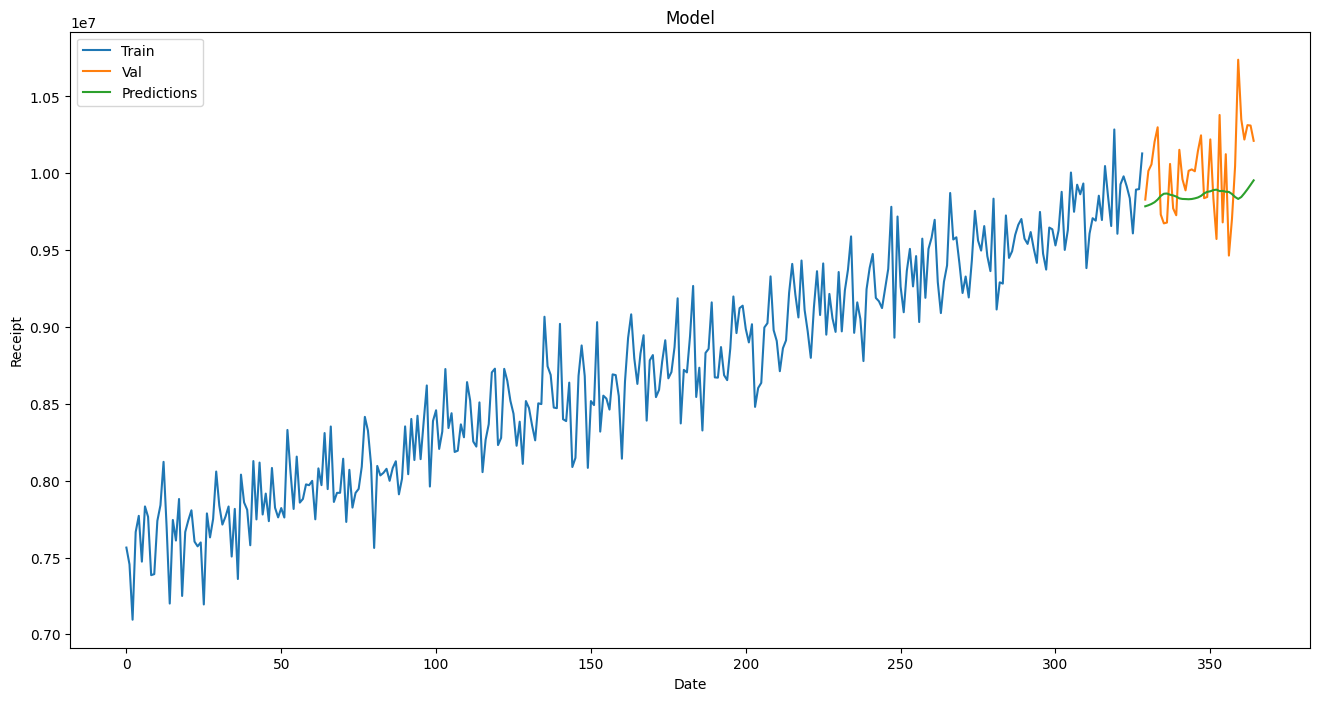

In [28]:
train=df[:training_data_len]
valid=df[training_data_len:]
valid['Predictions']=predictions
plt.figure(figsize=(16,8))
plt.title('Model')
plt.xlabel('Date')
plt.ylabel('Receipt')
plt.plot(train['Receipt_count'])
plt.plot(valid[['Receipt_count','Predictions']])
plt.legend(['Train','Val','Predictions'])
plt.show()

In [29]:
valid

,Date,Receipt_count,Day,Predictions
329,2021-11-26,9828852,329,9785187.0
330,2021-11-27,10014982,330,9791884.0
331,2021-11-28,10057900,331,9800423.0
332,2021-11-29,10204676,332,9811793.0
333,2021-11-30,10299217,333,9829020.0
334,2021-12-01,9731627,334,9853095.0
335,2021-12-02,9674146,335,9866856.0
336,2021-12-03,9679469,336,9868391.0
337,2021-12-04,10060861,337,9860465.0
338,2021-12-05,9771507,338,9855933.0


1/1 [==============================] - 0s 31ms/step


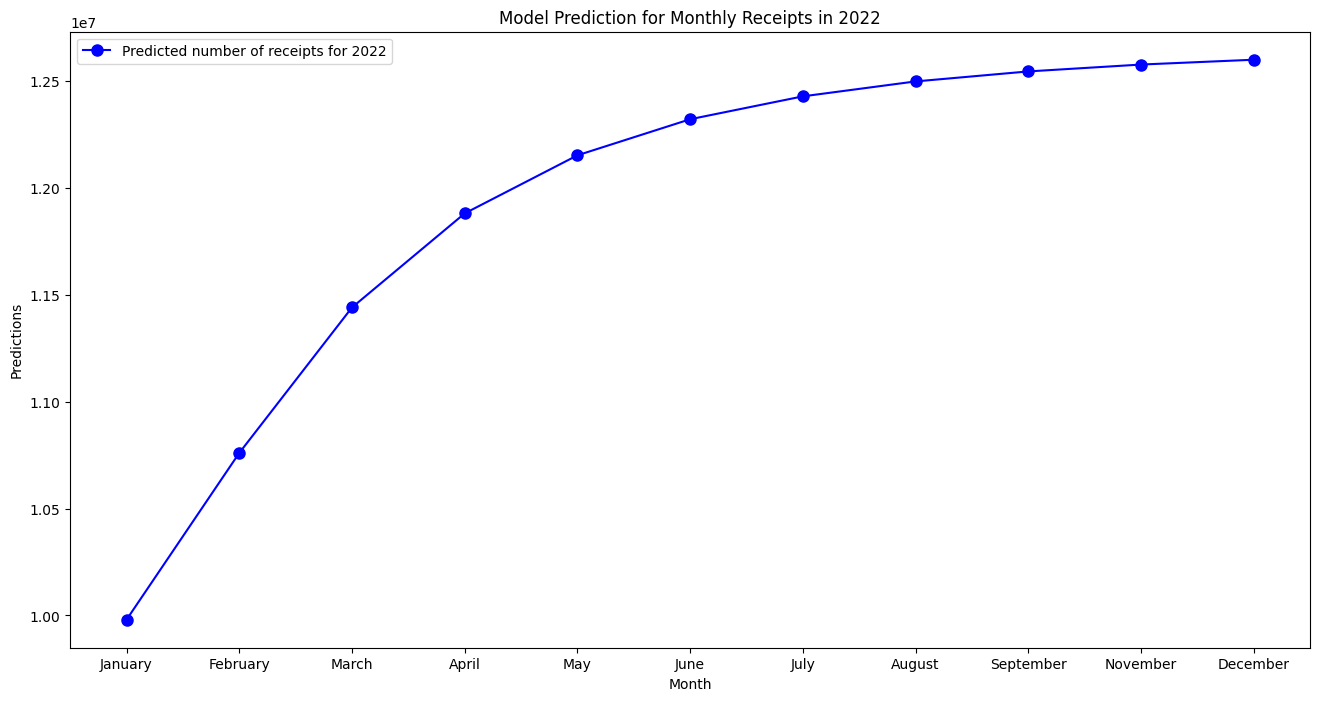

In [31]:
# Generate dates for each month in 2022
#dates_2022 = pd.date_range(start='2022-01-01', end='2022-12-31', freq='M')
months_2022=pd.DataFrame({'Month':['January','February','March','April','May','June','July','August','September','November','December']})
#months_2022


# Create an empty DataFrame for predictions
df_predictions_2022 = pd.DataFrame(index=months_2022, columns=['Predictions'])

# Prepare the input data for prediction
#X_pred_2022 = scaled_data[-60:, 0]  # Use the last 60 days from 2021 data as input
X_pred_2022 = scaled_data

# Make predictions for each month in 2022
for i in range(len(months_2022)):
    X_pred_2022 = np.array([X_pred_2022])
    X_pred_2022 = np.reshape(X_pred_2022, (X_pred_2022.shape[0], X_pred_2022.shape[1], 1))

    prediction = model.predict(X_pred_2022)
    prediction = scaler.inverse_transform(prediction)

    df_predictions_2022.iloc[i, 0] = prediction[0, 0]

    # Update X_pred_2022 for the next iteration
    X_pred_2022 = np.append(X_pred_2022[:, 1:], prediction[0, 0])

df_predictions_2022.index = months_2022['Month']
# Plot the predictions for 2022
plt.figure(figsize=(16, 8))
plt.title('Model Prediction for Monthly Receipts in 2022')
plt.xlabel('Month')
plt.ylabel('Predictions')
plt.plot(df_predictions_2022, label='Predicted number of receipts for 2022', linestyle='-', marker='o', markersize=8, color='blue')
plt.legend()
plt.show()


Testing with input as month in 2022

In [33]:
def predict_receipt_count(model, scaler, data, input_month):
    # Generate input data for the specified month
    months = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']

    if input_month.capitalize() not in months:
        print("Invalid month input. Please provide a valid month.")
        return None

    # Prepare input data for prediction
    input_data = data[-60:, 0]  # Use the last 60 days from existing data

    # Make predictions for the specified month
    for i in range(len(months)):
        if months[i].lower() == input_month.lower():
            break

    for _ in range(i + 1):
        input_data_reshaped = np.array([input_data])
        input_data_reshaped = np.reshape(input_data_reshaped, (input_data_reshaped.shape[0], input_data_reshaped.shape[1], 1))

        prediction = model.predict(input_data_reshaped)
        prediction = scaler.inverse_transform(prediction)
        input_data = np.append(input_data[1:], prediction[0, 0])

    return prediction[0, 0]




In [34]:
# Example usage:
input_month = 'August'
predicted_count = predict_receipt_count(model, scaler, scaled_data, input_month)
print(f"Predicted receipt count for {input_month}: {predicted_count}")

1/1 [==============================] - 0s 23ms/step
Predicted receipt count for August: 12499154.0


In [ ]:
# save the model
model.save('model.h5')

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(
